In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib as plt
from torch.utils.data import DataLoader
from torch.optim import lr_scheduler
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import _LRScheduler
import csv

%run '/kaggle/input/cte-dataloader/CTE.ipynb'
%run '/kaggle/input/cte-dataloader/dataloader.ipynb'


import numpy as np
import os

torch.Size([1, 105])


In [2]:
class LabelSomCE(nn.Module):
	def __init__(self):
		super().__init__()

	def forward(self,x,target,smoothing=0.1):
		confidence = 1.0 - smoothing
		logprobs = F.log_softmax(x,dim=-1)
		nll_loss = - logprobs.gather(dim=-1,index=target.unsqueeze(1))
		nll_loss = nll_loss.squeeze(1)
		smooth_loss = -logprobs.mean(dim=-1)
		loss = confidence * nll_loss + smoothing * smooth_loss

		return loss.mean()

def download(folder,thetarfile):
    import urllib.request
    import tarfile
    ftpstream = urllib.request.urlopen(thetarfile)
    thetarfile = tarfile.open(fileobj=ftpstream, mode="r|gz")
    thetarfile.extractall(folder)
    thetarfile.close()

def download_cerug(folder):
    thetarfile = "https://www.ai.rug.nl/~sheng/writerset/CERUG-EN-train-images.tar.gz"
    download(folder,thetarfile)
    thetarfile = "https://www.ai.rug.nl/~sheng/writerset/CERUG-EN-test-images.tar.gz"
    download(folder,thetarfile)

def download_firemaker(folder):
    thetarfile = "https://www.ai.rug.nl/~sheng/writerset/Firemaker-train-images.tar.gz"
    download(folder,thetarfile)
    thetarfile = "https://www.ai.rug.nl/~sheng/writerset/Firemaker-test-images.tar.gz"
    download(folder,thetarfile)


wsegs_writer_index_table.pickle
----------
loading dataset /kaggle/input/icdar19-wsegs/icdar19_wsegs with images: 109391
number of writer is: 511
-*-*-*-*-*-*-*-*-*-*
wsegs_writer_index_table.pickle
----------
loading dataset /kaggle/input/icdar19-wsegs/icdar19_wsegs with images: 31795
number of writer is: 511
-*-*-*-*-*-*-*-*-*-*
Traing epoch: 0   avg loss is: 5.230383312723105
Testing epoch: 0   avg testing loss is: 3.1618788710662296
Testing on epoch: 0 has accuracy: top1: 49.95 top5: 73.07


/tmp/ipykernel_24/4046947660.py:131: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Testing on epoch: %d has accuracy: top1: %.2f top5: %.2f'%(epoch,top1*100,top5*100))
/tmp/ipykernel_24/4046947660.py:133: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fp.write('Testing epoch %d accuracy is: top1: %.2f top5: %.2f\n'%(epoch,top1*100,top5*100))


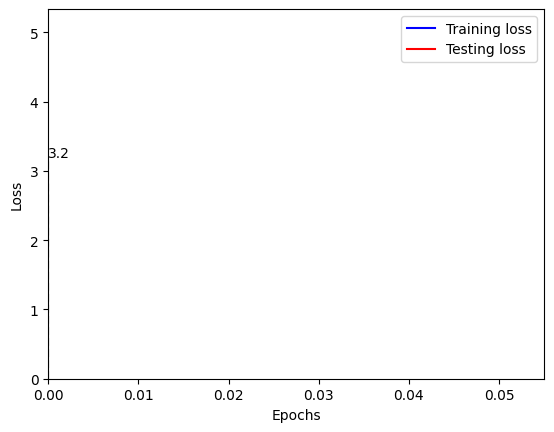

Traing epoch: 1   avg loss is: 2.7355595517046902
Testing epoch: 1   avg testing loss is: 2.4551534740857677
Testing on epoch: 1 has accuracy: top1: 65.73 top5: 85.83


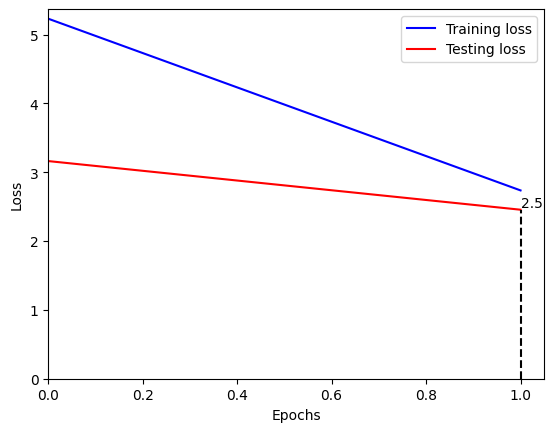

Traing epoch: 2   avg loss is: 2.2687740227051685
Testing epoch: 2   avg testing loss is: 2.1050616860149853
Testing on epoch: 2 has accuracy: top1: 75.16 top5: 91.17


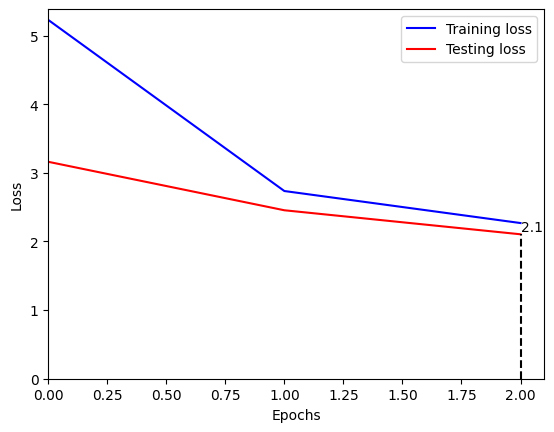

Traing epoch: 3   avg loss is: 2.03258463037579
Testing epoch: 3   avg testing loss is: 2.0655896684053676
Testing on epoch: 3 has accuracy: top1: 76.27 top5: 91.96


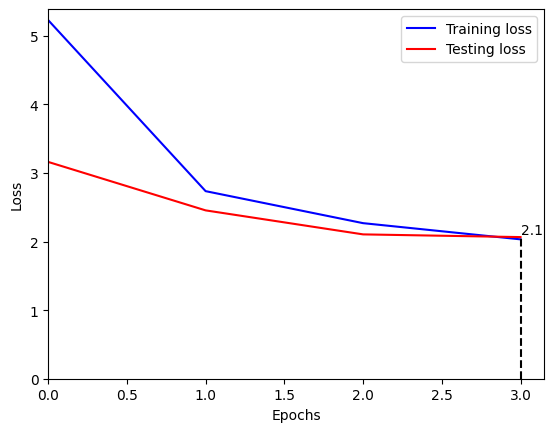

Traing epoch: 4   avg loss is: 1.8853744201976839
Testing epoch: 4   avg testing loss is: 1.8682181531754538
Testing on epoch: 4 has accuracy: top1: 82.20 top5: 94.38


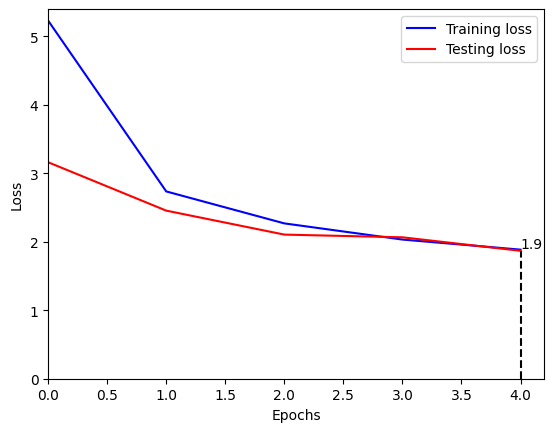

Traing epoch: 5   avg loss is: 1.7797079657587551
Testing epoch: 5   avg testing loss is: 1.865601546927477
Testing on epoch: 5 has accuracy: top1: 81.55 top5: 93.87


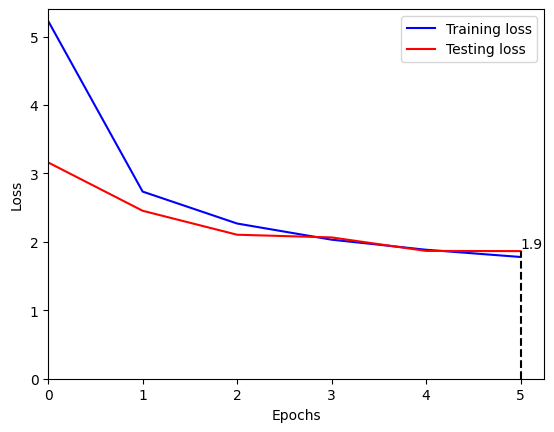

Traing epoch: 6   avg loss is: 1.6985886746536856
Testing epoch: 6   avg testing loss is: 1.7109950484044596
Testing on epoch: 6 has accuracy: top1: 86.39 top5: 95.59


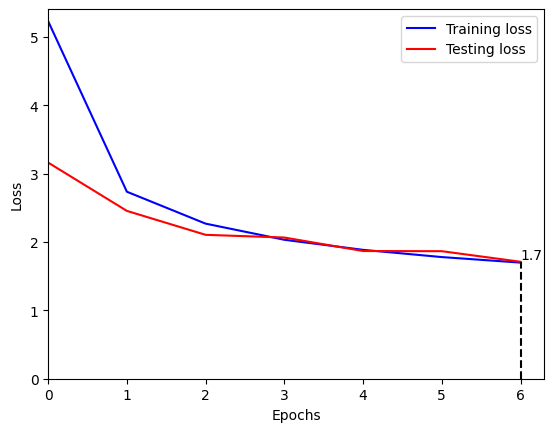

Traing epoch: 7   avg loss is: 1.6326242738854055
Testing epoch: 7   avg testing loss is: 1.6635503010970485
Testing on epoch: 7 has accuracy: top1: 87.05 top5: 95.64


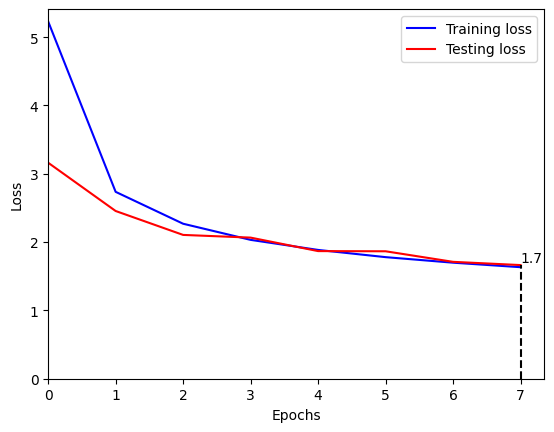

Traing epoch: 8   avg loss is: 1.5795325939944085
Testing epoch: 8   avg testing loss is: 1.605225259929116
Testing on epoch: 8 has accuracy: top1: 89.20 top5: 96.45


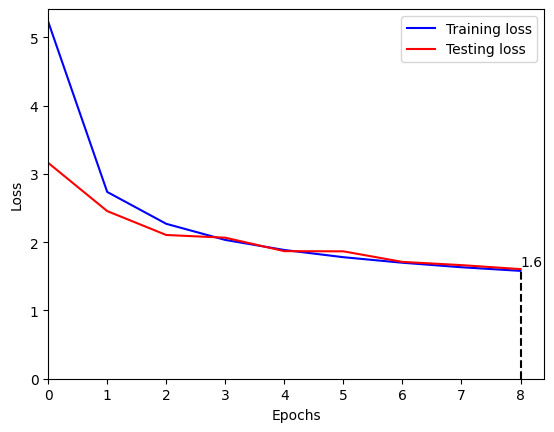

Traing epoch: 9   avg loss is: 1.5312101246495913
Testing epoch: 9   avg testing loss is: 1.5761529040528495
Testing on epoch: 9 has accuracy: top1: 89.50 top5: 96.43


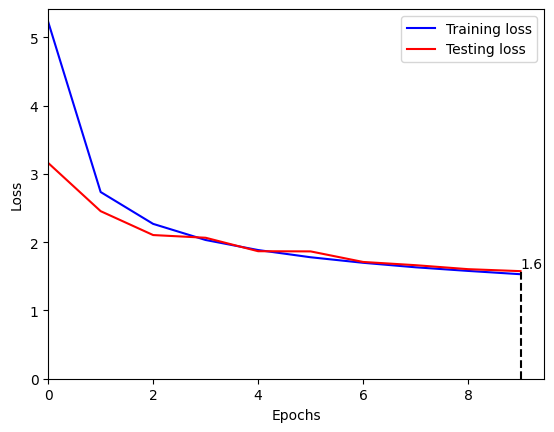

Traing epoch: 10   avg loss is: 1.3842910150291627
Testing epoch: 10   avg testing loss is: 1.457297657037405
Testing on epoch: 10 has accuracy: top1: 91.97 top5: 97.23


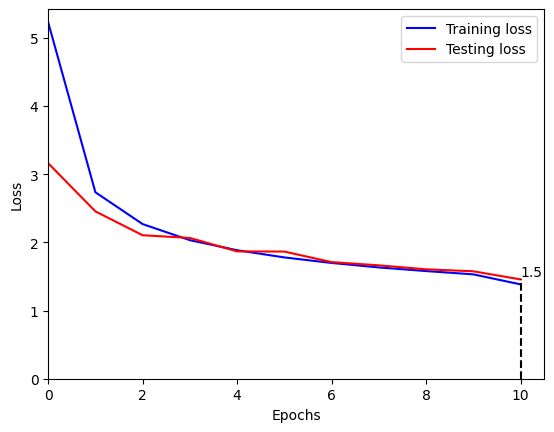

Traing epoch: 11   avg loss is: 1.3486003177845387
Testing epoch: 11   avg testing loss is: 1.443934472034155
Testing on epoch: 11 has accuracy: top1: 92.42 top5: 97.36


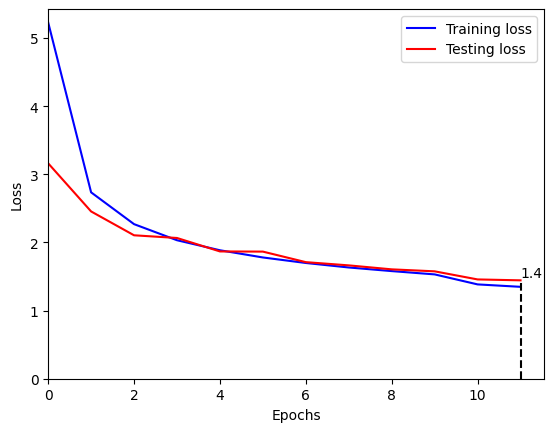

Traing epoch: 12   avg loss is: 1.3209297652478942
Testing epoch: 12   avg testing loss is: 1.4361152815027256
Testing on epoch: 12 has accuracy: top1: 92.44 top5: 97.32


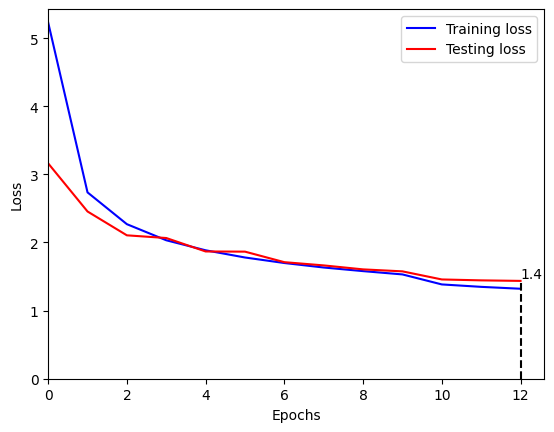

Traing epoch: 13   avg loss is: 1.2992123371156912
Testing epoch: 13   avg testing loss is: 1.4257084845417223
Testing on epoch: 13 has accuracy: top1: 92.25 top5: 97.37


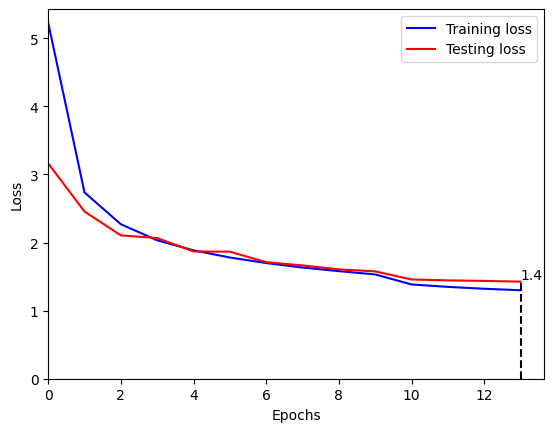

Traing epoch: 14   avg loss is: 1.2777273103882514
Testing epoch: 14   avg testing loss is: 1.410937934454298
Testing on epoch: 14 has accuracy: top1: 92.84 top5: 97.46


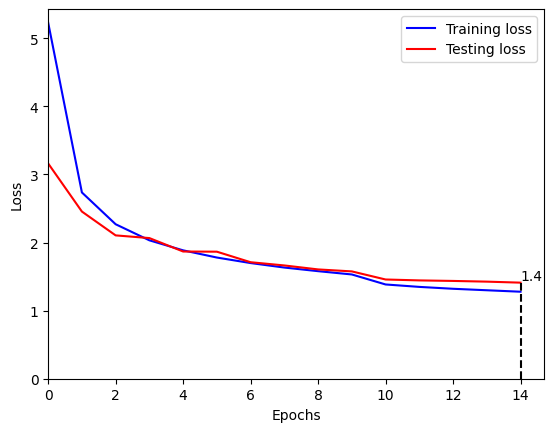

Traing epoch: 15   avg loss is: 1.259823020349266
Testing epoch: 15   avg testing loss is: 1.4074441574109153
Testing on epoch: 15 has accuracy: top1: 92.76 top5: 97.41


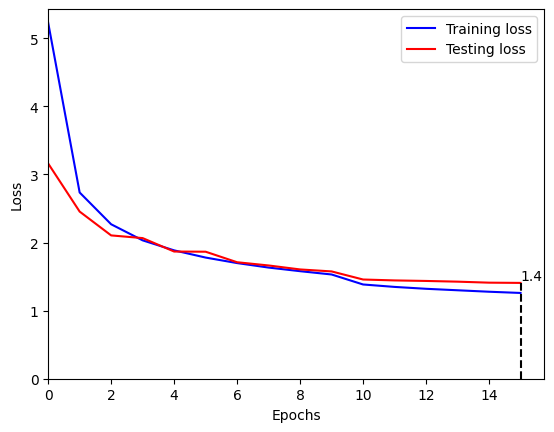

Traing epoch: 16   avg loss is: 1.2440495017748119
Testing epoch: 16   avg testing loss is: 1.418318648933165
Testing on epoch: 16 has accuracy: top1: 92.39 top5: 97.35


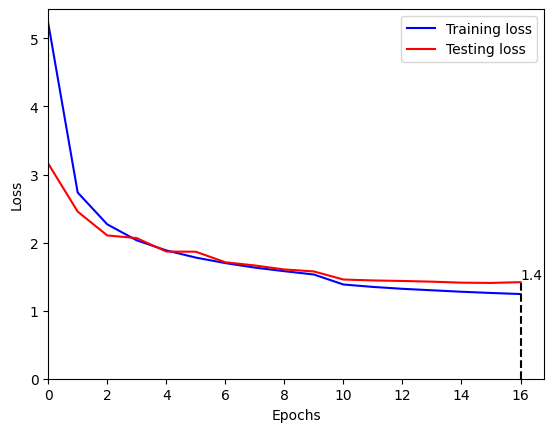

Traing epoch: 17   avg loss is: 1.22892915142287
Testing epoch: 17   avg testing loss is: 1.3835882814357459
Testing on epoch: 17 has accuracy: top1: 93.07 top5: 97.51


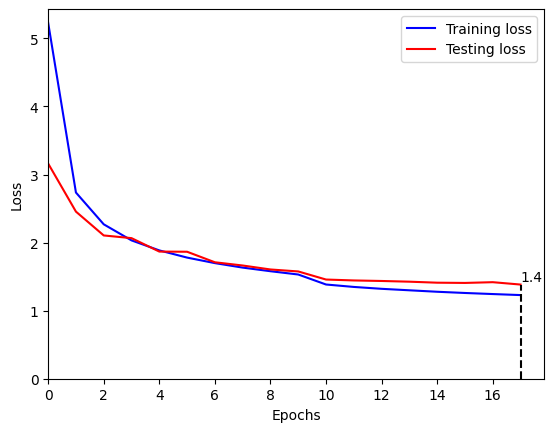

Traing epoch: 18   avg loss is: 1.2144358880412447
Testing epoch: 18   avg testing loss is: 1.40809598840938
Testing on epoch: 18 has accuracy: top1: 92.50 top5: 97.30


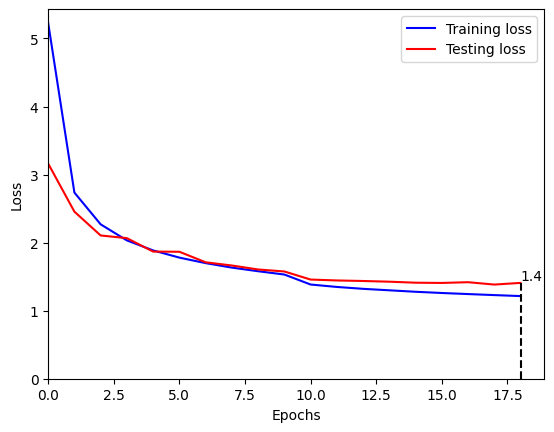

Traing epoch: 19   avg loss is: 1.201927724866019
Testing epoch: 19   avg testing loss is: 1.416779550868021
Testing on epoch: 19 has accuracy: top1: 92.31 top5: 97.34


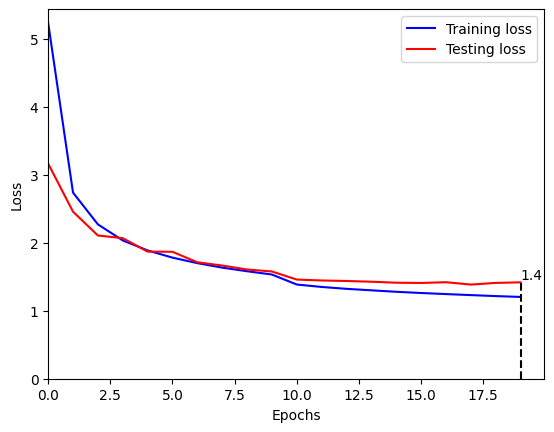

Traing epoch: 20   avg loss is: 1.1399791938404789
Testing epoch: 20   avg testing loss is: 1.338885360320569
Testing on epoch: 20 has accuracy: top1: 94.13 top5: 97.76


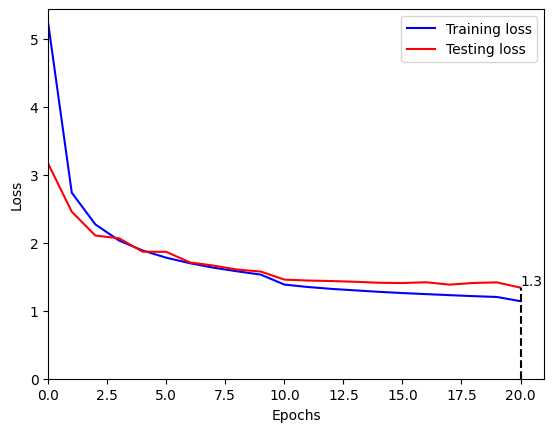

Traing epoch: 21   avg loss is: 1.1253734845352006
Testing epoch: 21   avg testing loss is: 1.3445848460408523
Testing on epoch: 21 has accuracy: top1: 93.97 top5: 97.66


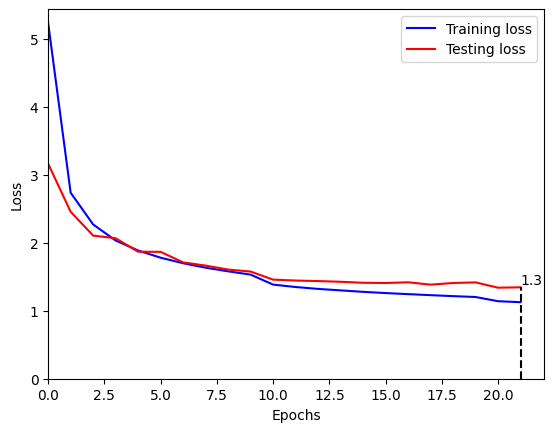

Traing epoch: 22   avg loss is: 1.117580975336663
Testing epoch: 22   avg testing loss is: 1.3321422996295529
Testing on epoch: 22 has accuracy: top1: 93.98 top5: 97.61


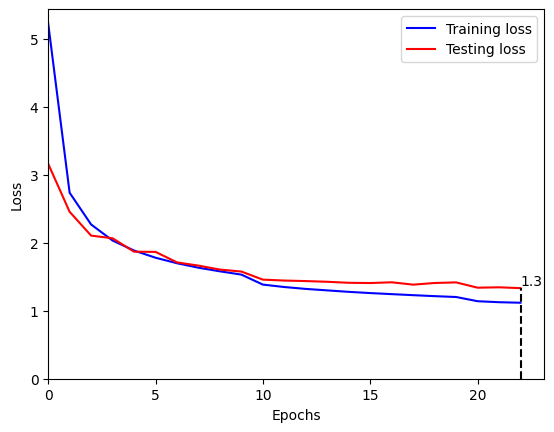

Traing epoch: 23   avg loss is: 1.110338552190659
Testing epoch: 23   avg testing loss is: 1.3398853097283385
Testing on epoch: 23 has accuracy: top1: 93.99 top5: 97.61


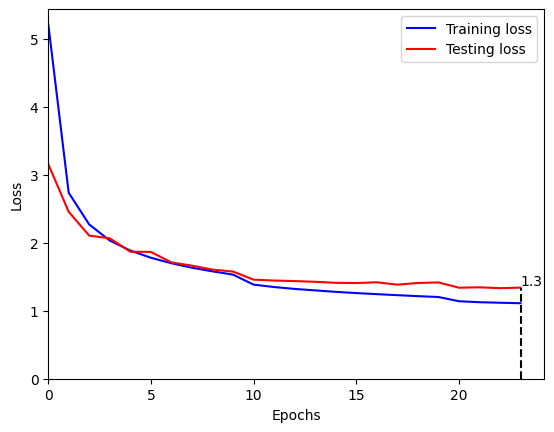

Traing epoch: 24   avg loss is: 1.103353310600926
Testing epoch: 24   avg testing loss is: 1.336399311690743
Testing on epoch: 24 has accuracy: top1: 93.75 top5: 97.61


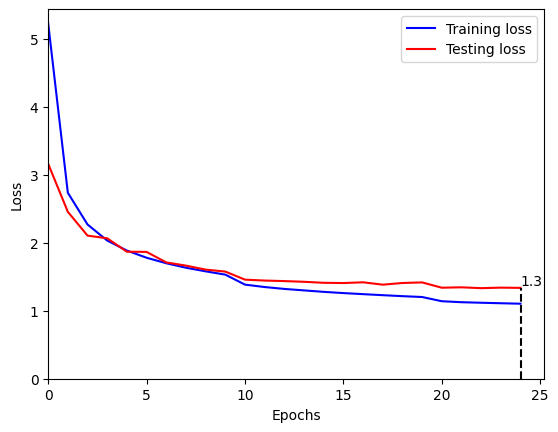

Traing epoch: 25   avg loss is: 1.0982548147701534
Testing epoch: 25   avg testing loss is: 1.3327569307335905
Testing on epoch: 25 has accuracy: top1: 93.77 top5: 97.62


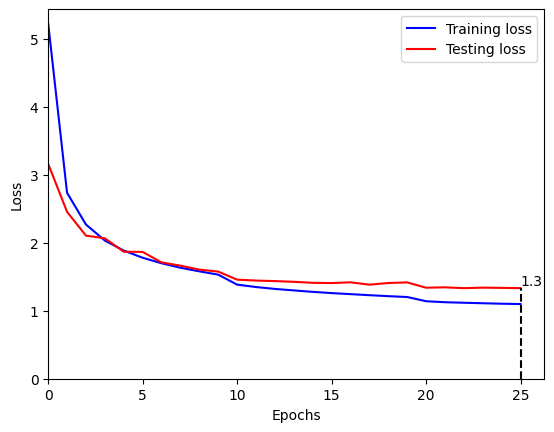

Traing epoch: 26   avg loss is: 1.0926838902055764
Testing epoch: 26   avg testing loss is: 1.3260436885553586
Testing on epoch: 26 has accuracy: top1: 94.11 top5: 97.66


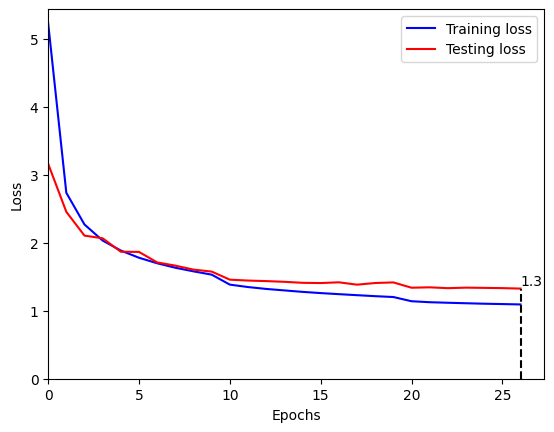

Traing epoch: 27   avg loss is: 1.088972550951437
Testing epoch: 27   avg testing loss is: 1.324697285290935
Testing on epoch: 27 has accuracy: top1: 94.13 top5: 97.59


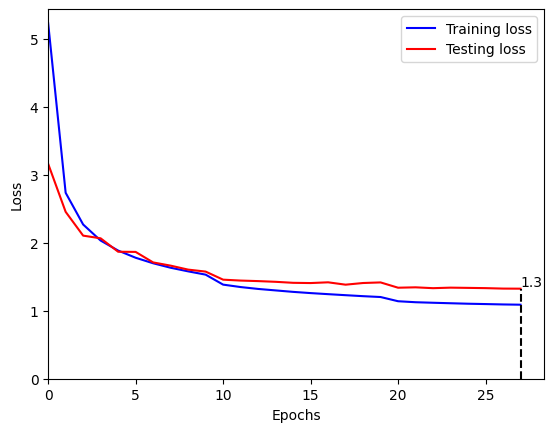

Traing epoch: 28   avg loss is: 1.0851571100925828
Testing epoch: 28   avg testing loss is: 1.3433230588253835
Testing on epoch: 28 has accuracy: top1: 93.70 top5: 97.48


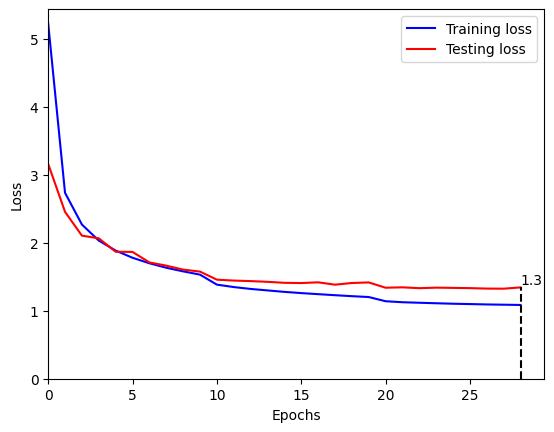

Traing epoch: 29   avg loss is: 1.081129421209159
Testing epoch: 29   avg testing loss is: 1.3325117460079117
Testing on epoch: 29 has accuracy: top1: 93.87 top5: 97.52


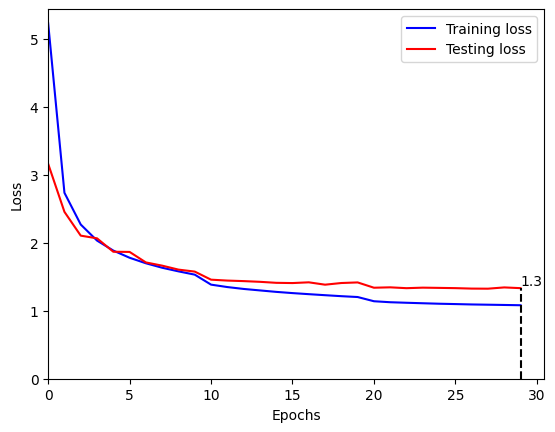

Traing epoch: 30   avg loss is: 1.060142309886102
Testing epoch: 30   avg testing loss is: 1.297464937751202
Testing on epoch: 30 has accuracy: top1: 94.55 top5: 97.75


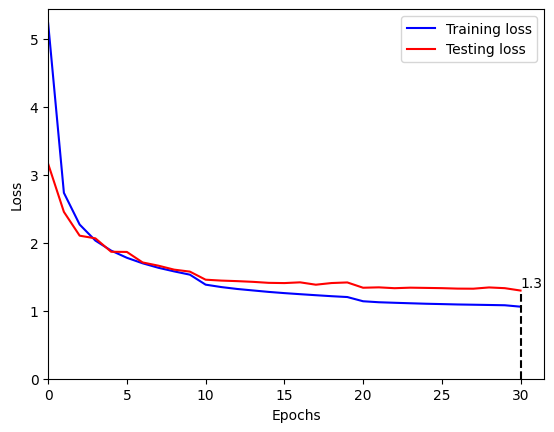

Traing epoch: 31   avg loss is: 1.0545935609523422
Testing epoch: 31   avg testing loss is: 1.2944051499817693
Testing on epoch: 31 has accuracy: top1: 94.55 top5: 97.78


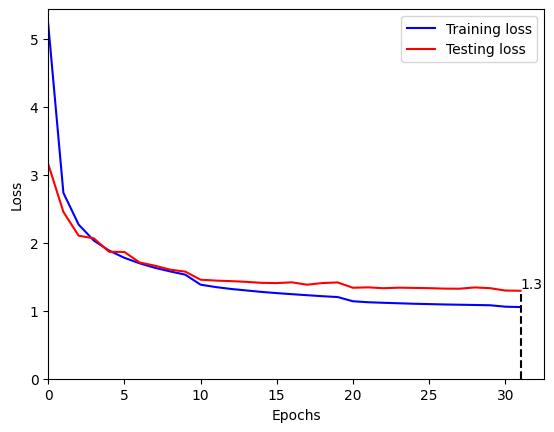

Traing epoch: 32   avg loss is: 1.0517588900919892
Testing epoch: 32   avg testing loss is: 1.2897407792103843
Testing on epoch: 32 has accuracy: top1: 94.63 top5: 97.77


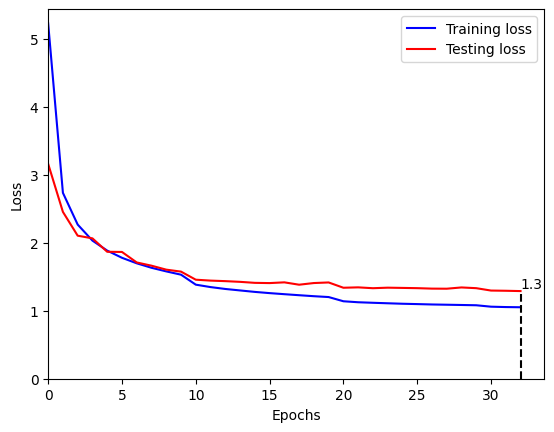

Traing epoch: 33   avg loss is: 1.0490578011401988
Testing epoch: 33   avg testing loss is: 1.2959111843190683
Testing on epoch: 33 has accuracy: top1: 94.46 top5: 97.71


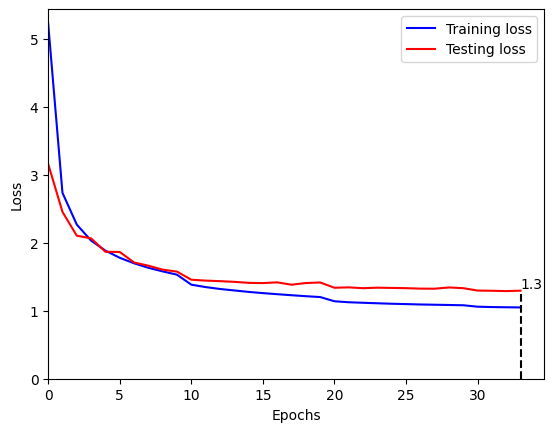

Traing epoch: 34   avg loss is: 1.0465485832194545
Testing epoch: 34   avg testing loss is: 1.2956100906764478
Testing on epoch: 34 has accuracy: top1: 94.47 top5: 97.72


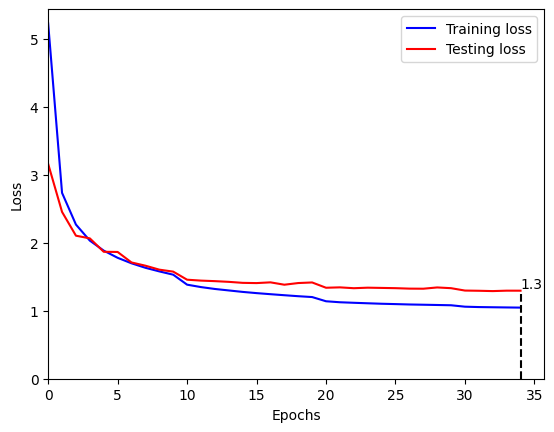

Traing epoch: 35   avg loss is: 1.0450022534678176
Testing epoch: 35   avg testing loss is: 1.2927698494802777
Testing on epoch: 35 has accuracy: top1: 94.51 top5: 97.80


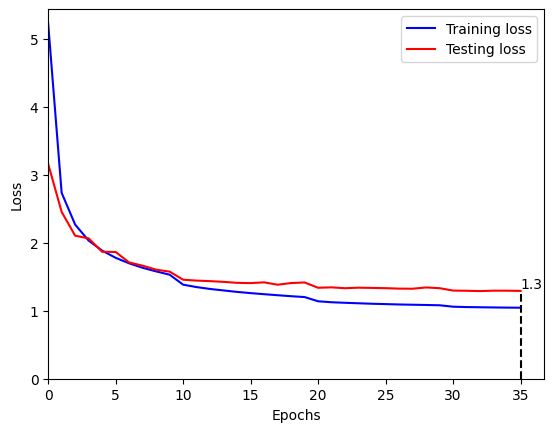

Traing epoch: 36   avg loss is: 1.0430128792788007
Testing epoch: 36   avg testing loss is: 1.2885914305206276
Testing on epoch: 36 has accuracy: top1: 94.62 top5: 97.74


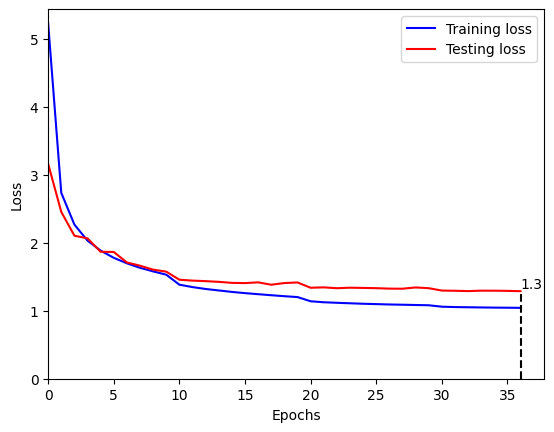

Traing epoch: 37   avg loss is: 1.0412894706756766
Testing epoch: 37   avg testing loss is: 1.2912246799564937
Testing on epoch: 37 has accuracy: top1: 94.44 top5: 97.69


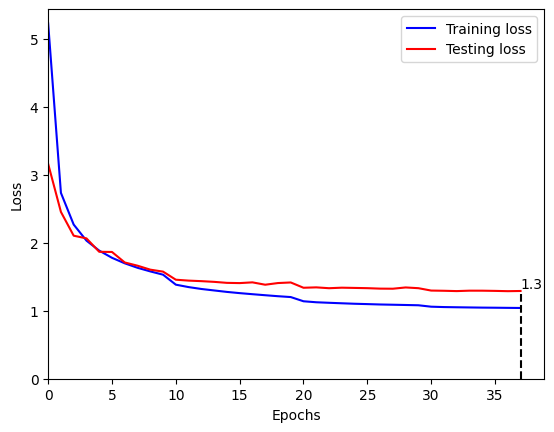

Traing epoch: 38   avg loss is: 1.0396164644350427
Testing epoch: 38   avg testing loss is: 1.2904114106771212
Testing on epoch: 38 has accuracy: top1: 94.44 top5: 97.59


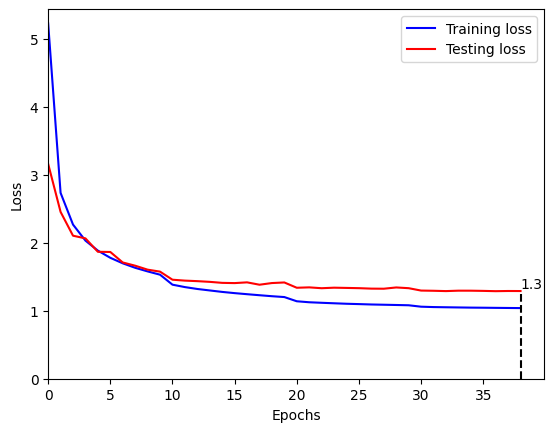

Traing epoch: 39   avg loss is: 1.0382099413362562
Testing epoch: 39   avg testing loss is: 1.2921026323882627
Testing on epoch: 39 has accuracy: top1: 94.40 top5: 97.72


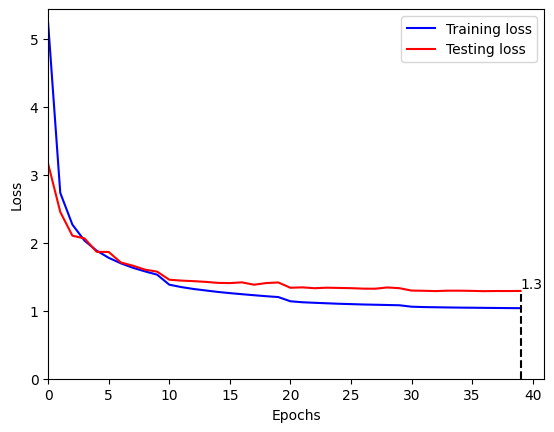

Traing epoch: 40   avg loss is: 1.030417629244594
Testing epoch: 40   avg testing loss is: 1.279243137095296
Testing on epoch: 40 has accuracy: top1: 94.63 top5: 97.76


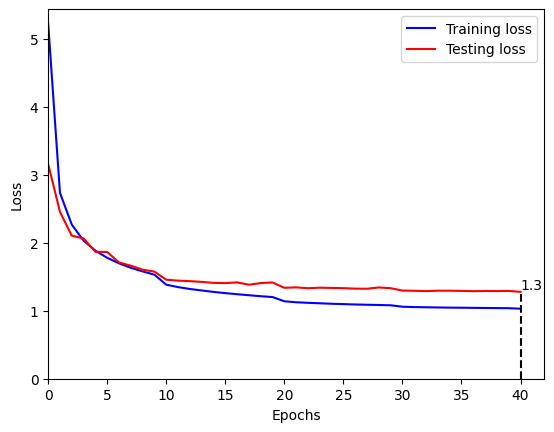

Traing epoch: 41   avg loss is: 1.027861611362854
Testing epoch: 41   avg testing loss is: 1.2796799215512495
Testing on epoch: 41 has accuracy: top1: 94.57 top5: 97.72


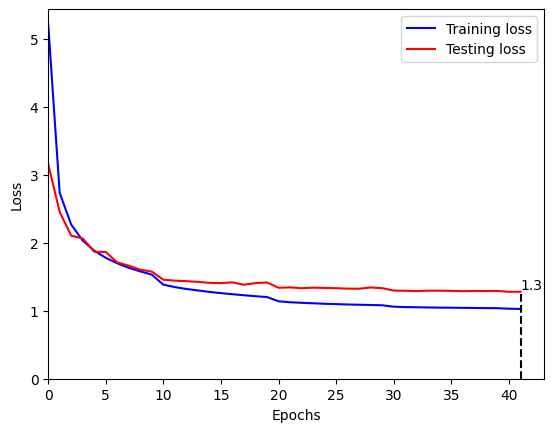

Traing epoch: 42   avg loss is: 1.0268198923540786
Testing epoch: 42   avg testing loss is: 1.281700740397816
Testing on epoch: 42 has accuracy: top1: 94.66 top5: 97.74


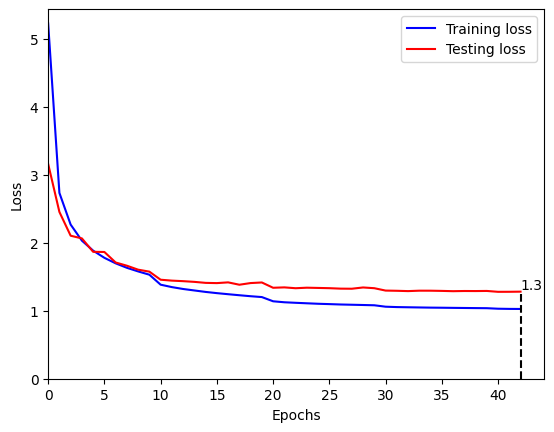

Traing epoch: 43   avg loss is: 1.0255818848131413
Testing epoch: 43   avg testing loss is: 1.2800477787522484
Testing on epoch: 43 has accuracy: top1: 94.72 top5: 97.74


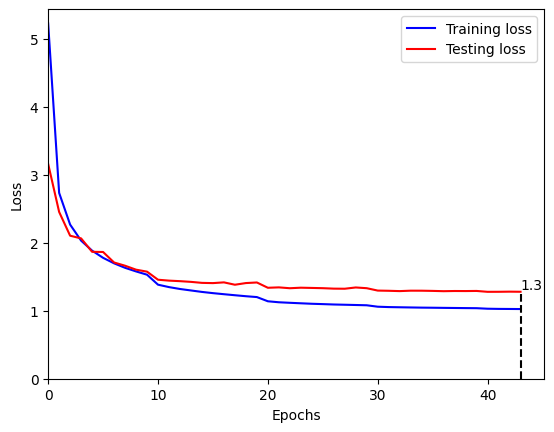

Traing epoch: 44   avg loss is: 1.0248911119714126
Testing epoch: 44   avg testing loss is: 1.2776827604118248
Testing on epoch: 44 has accuracy: top1: 94.66 top5: 97.74


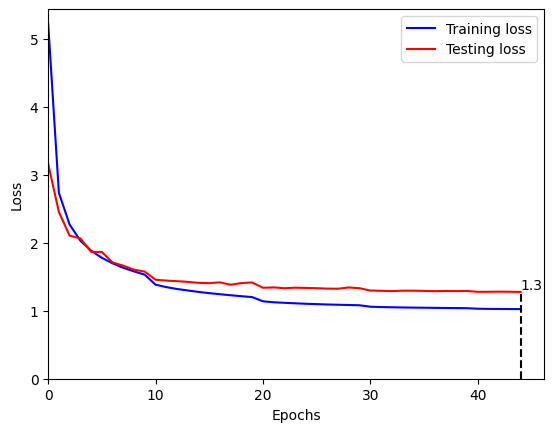

Traing epoch: 45   avg loss is: 1.0238694973320484
Testing epoch: 45   avg testing loss is: 1.2827447114935824
Testing on epoch: 45 has accuracy: top1: 94.48 top5: 97.71


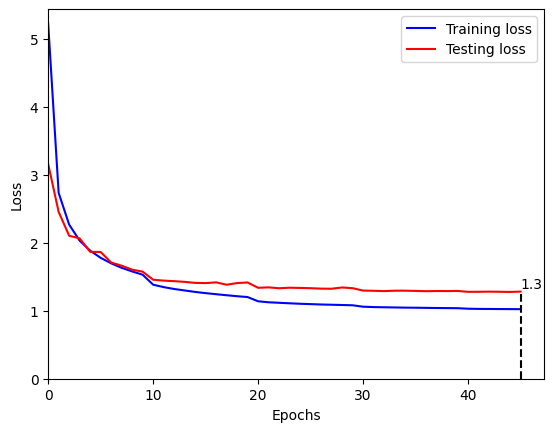

Traing epoch: 46   avg loss is: 1.0230088095224832
Testing epoch: 46   avg testing loss is: 1.2794666563121366
Testing on epoch: 46 has accuracy: top1: 94.54 top5: 97.67


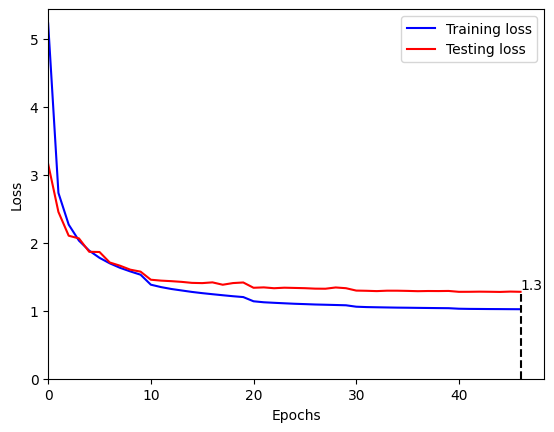

Traing epoch: 47   avg loss is: 1.0222805394824308
Testing epoch: 47   avg testing loss is: 1.2836996220966699
Testing on epoch: 47 has accuracy: top1: 94.55 top5: 97.68


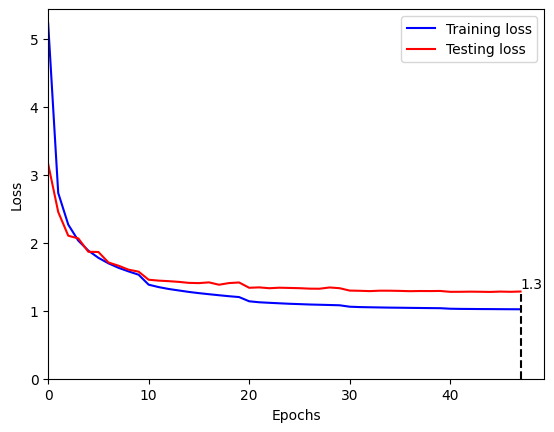

Traing epoch: 48   avg loss is: 1.0215489632069124
Testing epoch: 48   avg testing loss is: 1.2790370096623058
Testing on epoch: 48 has accuracy: top1: 94.62 top5: 97.68


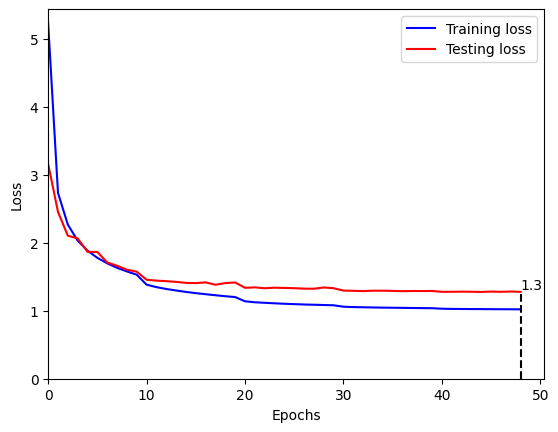

Traing epoch: 49   avg loss is: 1.0206143688726592
Testing epoch: 49   avg testing loss is: 1.2808419881272364
Testing on epoch: 49 has accuracy: top1: 94.58 top5: 97.69


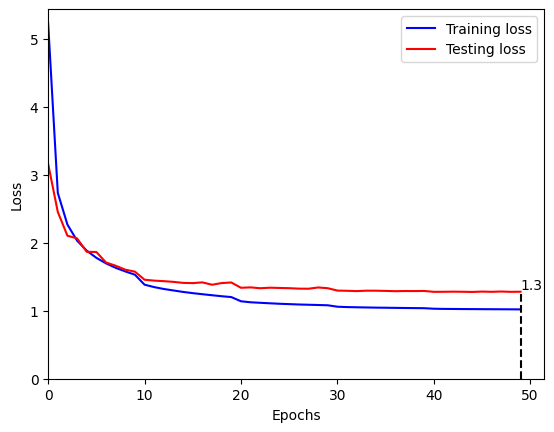

Traing epoch: 50   avg loss is: 1.0173265856214961
Testing epoch: 50   avg testing loss is: 1.278646680131045
Testing on epoch: 50 has accuracy: top1: 94.65 top5: 97.76


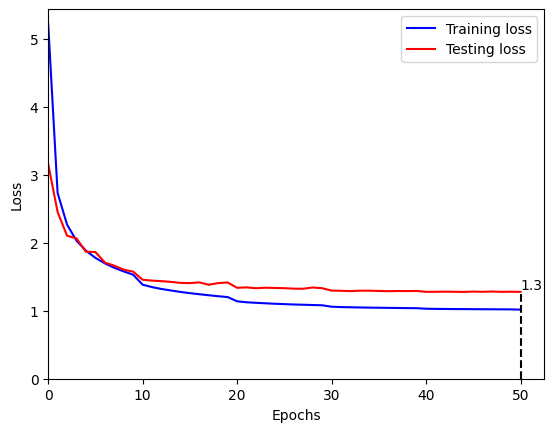

Traing epoch: 51   avg loss is: 1.0163776130792062
Testing epoch: 51   avg testing loss is: 1.2766937129874105
Testing on epoch: 51 has accuracy: top1: 94.62 top5: 97.74


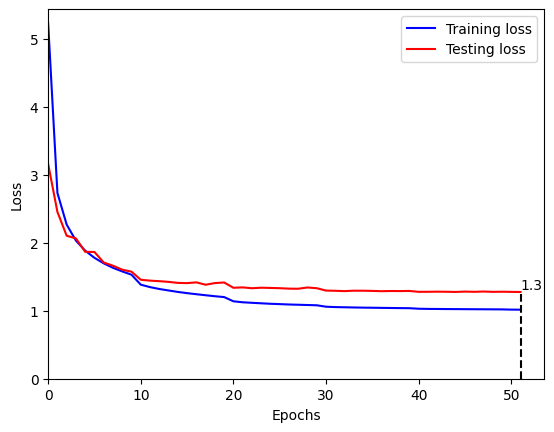

Traing epoch: 52   avg loss is: 1.0156494552556223
Testing epoch: 52   avg testing loss is: 1.2770374683247245
Testing on epoch: 52 has accuracy: top1: 94.62 top5: 97.73


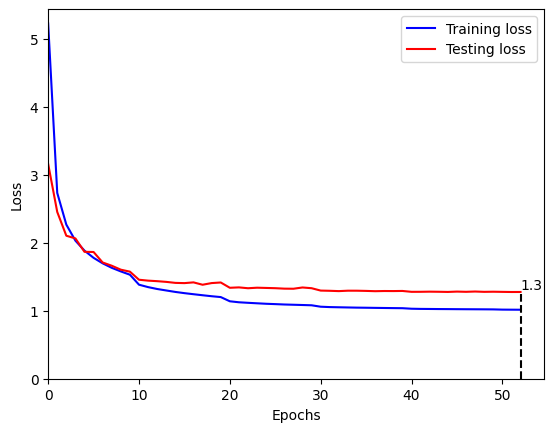

Traing epoch: 53   avg loss is: 1.0153412773568704
Testing epoch: 53   avg testing loss is: 1.2791138514726454
Testing on epoch: 53 has accuracy: top1: 94.71 top5: 97.74


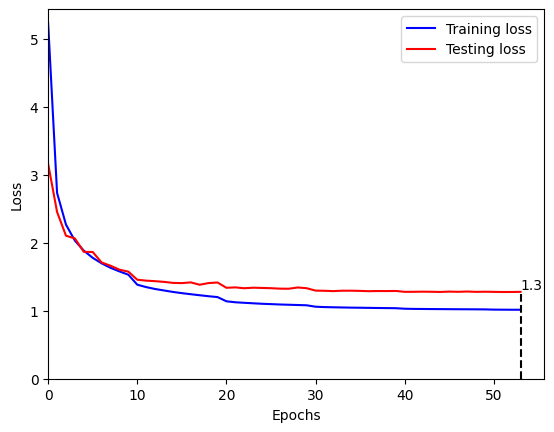

Traing epoch: 54   avg loss is: 1.0148947449927443
Testing epoch: 54   avg testing loss is: 1.2774207402223072
Testing on epoch: 54 has accuracy: top1: 94.59 top5: 97.71


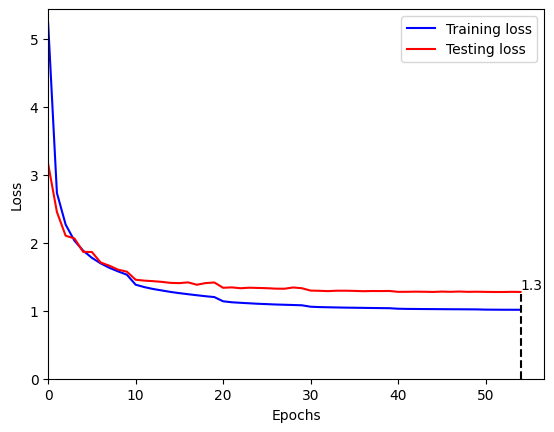

Traing epoch: 55   avg loss is: 1.0144995935239451
Testing epoch: 55   avg testing loss is: 1.2779283539450144
Testing on epoch: 55 has accuracy: top1: 94.64 top5: 97.67


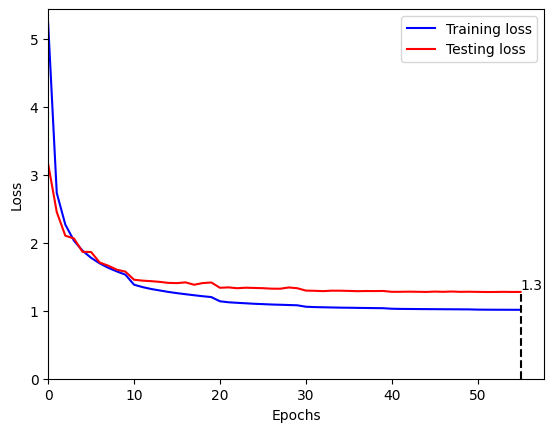

Traing epoch: 56   avg loss is: 1.0138792165142532
Testing epoch: 56   avg testing loss is: 1.27948707561018
Testing on epoch: 56 has accuracy: top1: 94.61 top5: 97.66


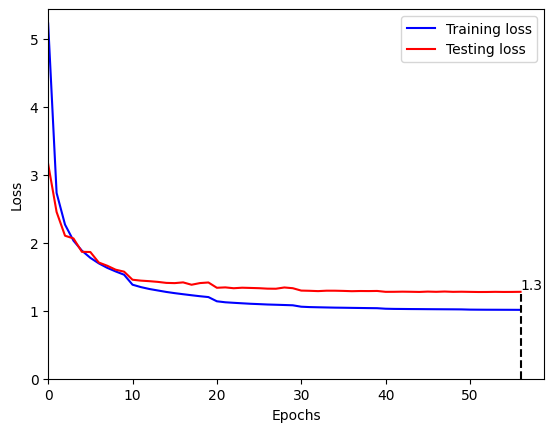

Traing epoch: 57   avg loss is: 1.0136455783305494
Testing epoch: 57   avg testing loss is: 1.2775816825374031
Testing on epoch: 57 has accuracy: top1: 94.65 top5: 97.71


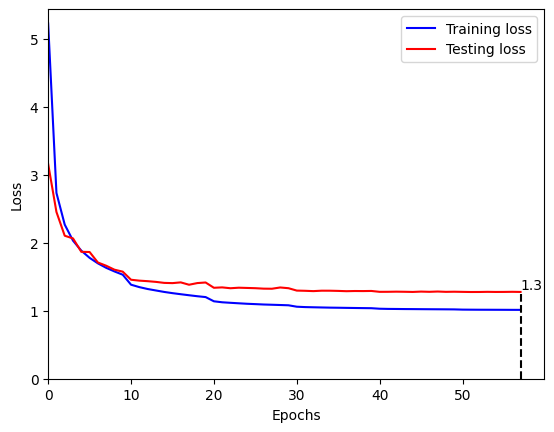

Traing epoch: 58   avg loss is: 1.013286032519402
Testing epoch: 58   avg testing loss is: 1.2777010408985303
Testing on epoch: 58 has accuracy: top1: 94.64 top5: 97.68


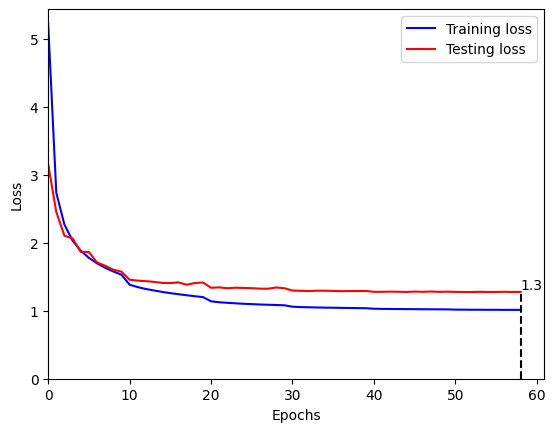

Traing epoch: 59   avg loss is: 1.0127242809241106
Testing epoch: 59   avg testing loss is: 1.2777911092733714
Testing on epoch: 59 has accuracy: top1: 94.57 top5: 97.70


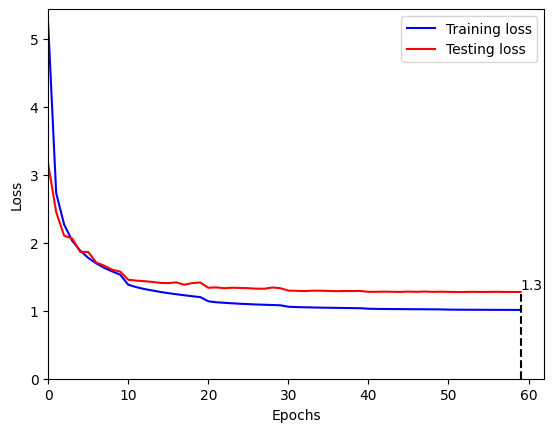

Traing epoch: 60   avg loss is: 1.01130049969977
Testing epoch: 60   avg testing loss is: 1.2780282372380167
Testing on epoch: 60 has accuracy: top1: 94.62 top5: 97.71


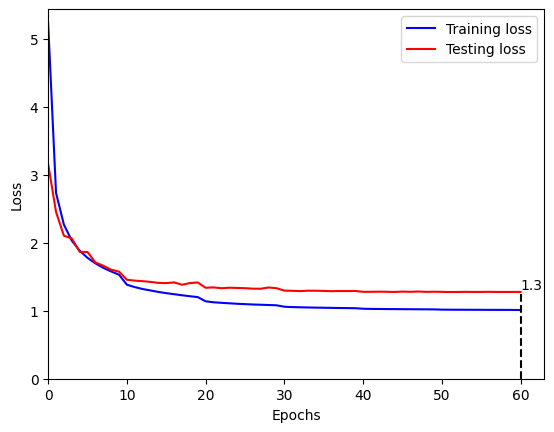

Traing epoch: 61   avg loss is: 1.0109369945916744
Testing epoch: 61   avg testing loss is: 1.2791268570981995
Testing on epoch: 61 has accuracy: top1: 94.58 top5: 97.72


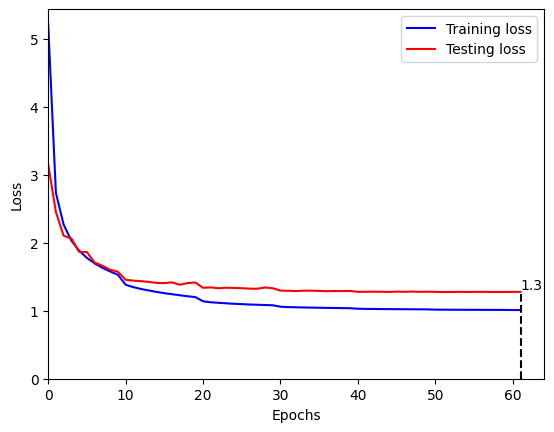

Traing epoch: 62   avg loss is: 1.0104537534131302
Testing epoch: 62   avg testing loss is: 1.2766776581705217
Testing on epoch: 62 has accuracy: top1: 94.61 top5: 97.68


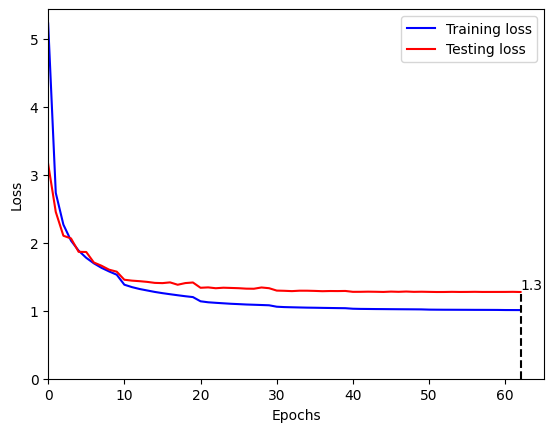

Traing epoch: 63   avg loss is: 1.0103803566494065
Testing epoch: 63   avg testing loss is: 1.27816156404359
Testing on epoch: 63 has accuracy: top1: 94.60 top5: 97.70


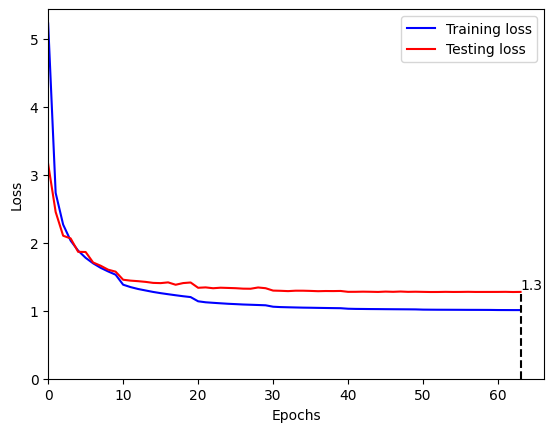

Traing epoch: 64   avg loss is: 1.0102848230467127
Testing epoch: 64   avg testing loss is: 1.2781912840048313
Testing on epoch: 64 has accuracy: top1: 94.63 top5: 97.72


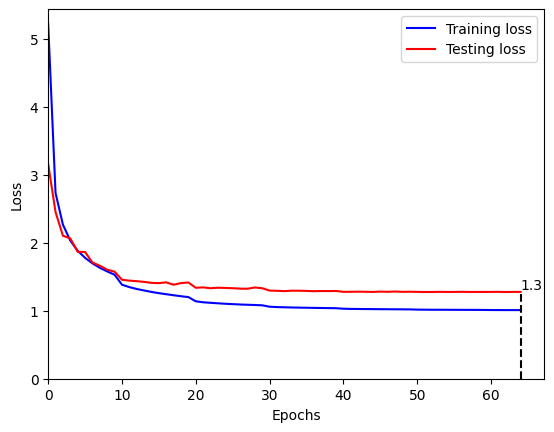

Traing epoch: 65   avg loss is: 1.0100948163436267
Testing epoch: 65   avg testing loss is: 1.2780989988948737
Testing on epoch: 65 has accuracy: top1: 94.66 top5: 97.68


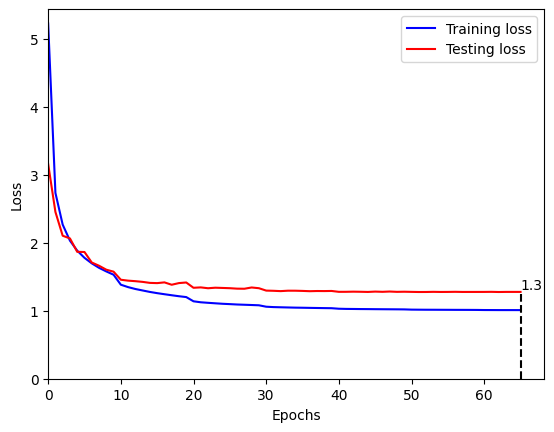

Traing epoch: 66   avg loss is: 1.0097939693017477
Testing epoch: 66   avg testing loss is: 1.2764241995226209
Testing on epoch: 66 has accuracy: top1: 94.63 top5: 97.67


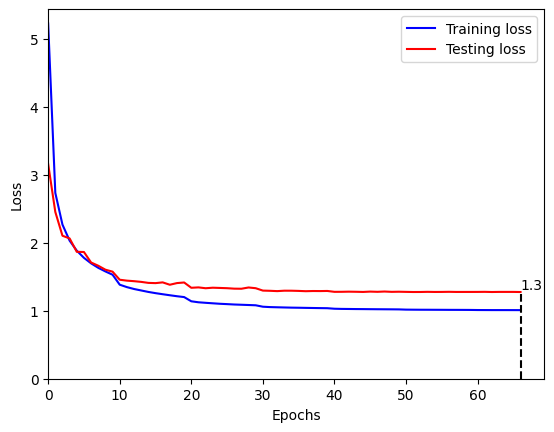

Traing epoch: 67   avg loss is: 1.009509139055045
Testing epoch: 67   avg testing loss is: 1.2765354324934228
Testing on epoch: 67 has accuracy: top1: 94.62 top5: 97.67


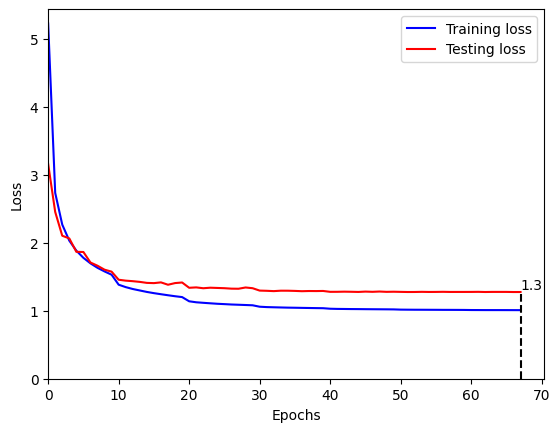

Traing epoch: 68   avg loss is: 1.009470118250046
Testing epoch: 68   avg testing loss is: 1.276138620597256
Testing on epoch: 68 has accuracy: top1: 94.66 top5: 97.72


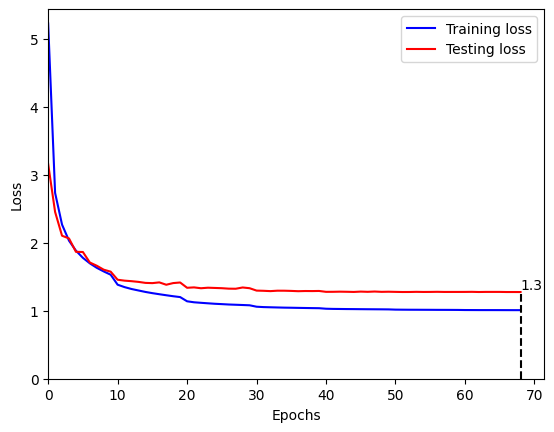

Traing epoch: 69   avg loss is: 1.009198135228238
Testing epoch: 69   avg testing loss is: 1.2779032220123279
Testing on epoch: 69 has accuracy: top1: 94.65 top5: 97.68


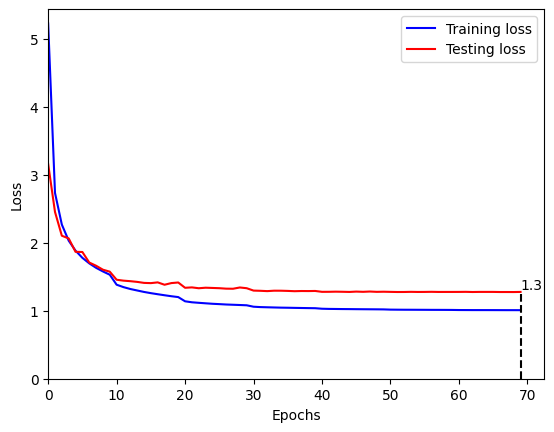

In [3]:
class DeepWriter_Train:
    def __init__(self,dataset='CERUG-EN',imgtype='png'):

        self.dataset = dataset
        self.folder = dataset
        #self.labelfolder = 'dataset/'

        if not os.path.exists(self.folder):
            if dataset == 'CERUG-EN':
                download_cerug(dataset)
            elif dataset == 'Firemaker':
                download_firemaker(dataset)
            else:
                print('****** Warning: the dataset %s does not existed!******'%dataset)
                print('Please go to the following website to check how to download the dataset:')
                print('https://www.ai.rug.nl/~sheng/writeridataset.html')
                print('*'*20)
                raise ValueError('Dataset: %s does not existed!'%dataset)

        self.labelfolder = self.folder
        self.train_folder = self.folder+'/train/'
        self.test_folder = self.folder+'/holdout_set/'

        self.imgtype=imgtype
        self.device = 'cuda'
        self.scale_size=(64,128)

        if self.device == 'cuda':
            torch.backends.cudnn.benchmark = True

        if self.dataset == 'CVL':
            self.imgtype = 'tif'

        self.model_dir = 'model'
        if not os.path.exists(self.model_dir):
            #raise ValueError('Model directory: %s does not existed'%self.model_dir)
            os.mkdir(self.model_dir)#raise ValueError('Model directory: %s does not existed'%self.model_dir)

        basedir = 'CTE_WriterIdentification_dataset_ICDAR19_model'
        self.logfile= basedir + '.log'
        self.modelfile = basedir
        self.batch_size = 16

        train_set = DatasetFromFolder(dataset=self.dataset,
        				labelfolder = self.labelfolder,
                        foldername=self.train_folder,
                        imgtype=self.imgtype,
                        scale_size=self.scale_size,
                        is_training = True)

        self.training_data_loader = DataLoader(dataset=train_set, num_workers=2,
                           batch_size=self.batch_size, shuffle=True, drop_last=True)

        test_set = DatasetFromFolder(dataset=self.dataset,
        				labelfolder = self.labelfolder,
                        foldername=self.test_folder,imgtype=self.imgtype,
                        scale_size=self.scale_size,
                        is_training = False)

        self.testing_data_loader = DataLoader(dataset=test_set, num_workers=2,
                           batch_size=self.batch_size, shuffle=False)

        num_class = train_set.num_writer
        self.model = GrnnNet(1,num_classes=train_set.num_writer).to(self.device)

        #self.criterion = nn.CrossEntropyLoss()
        self.criterion = LabelSomCE()
        self.optimizer = optim.Adam(self.model.parameters(),lr=0.0001,weight_decay=1e-4)
        self.scheduler = lr_scheduler.StepLR(self.optimizer,step_size=10,gamma=0.5)


    def train(self,epoch):
        self.model.train()
        losstotal = []

        for iteration,batch in enumerate(self.training_data_loader,1):
            inputs = batch[0].to(self.device).float()
            target = batch[1].type(torch.long).to(self.device)

            self.optimizer.zero_grad()

            logits = self.model(inputs)

            train_loss= self.criterion(logits,target)

            losstotal.append(train_loss.item())
            train_loss.backward()
            self.optimizer.step()

        with open(self.logfile,'a') as fp:
            fp.write('Training epoch %d avg loss is: %.6f\n'%(epoch,np.mean(losstotal)))
        print('Traing epoch:',epoch,'  avg loss is:',np.mean(losstotal))


        return np.mean(losstotal)


    def test(self,epoch,during_train=True):
        self.model.eval()
        losstotal = []

        if not during_train:
            self.load_model(epoch)

        top1 = 0
        top5 = 0
        ntotal=0

        for iteration,batch in enumerate(self.testing_data_loader,1):
            inputs = batch[0].to(self.device).float()
            target = batch[1].to(self.device).long()

            logits = self.model(inputs)

            test_loss = self.criterion(logits,target)

            losstotal.append(test_loss.item())

            res = self.accuracy(logits,target,topk=(1,5))
            top1 += res[0]
            top5 += res[1]

            ntotal += inputs.size(0)



        top1 /= float(ntotal)
        top5 /= float(ntotal)

        print('Testing epoch:',epoch,'  avg testing loss is:',np.mean(losstotal))
        print('Testing on epoch: %d has accuracy: top1: %.2f top5: %.2f'%(epoch,top1*100,top5*100))
        with open(self.logfile,'a') as fp:
            fp.write('Testing epoch %d accuracy is: top1: %.2f top5: %.2f\n'%(epoch,top1*100,top5*100))

        return np.mean(losstotal)



    def check_exists(self,epoch):
        model_out_path = self.model_dir + '/' + self.modelfile + '-model_epoch_{}.pth'.format(epoch)
        return os.path.exists(model_out_path)

    def checkpoint(self,epoch):
        model_out_path = self.model_dir + '/' + self.modelfile + '-model_epoch_{}.pth'.format(epoch)
        torch.save(self.model.state_dict(),model_out_path)


    def load_model(self,epoch):
        model_out_path = self.model_dir + '/' + self.modelfile + '-model_epoch_{}.pth'.format(epoch)
        self.model.load_state_dict(torch.load(model_out_path,map_location=self.device))
        print('Load model successful')
        
    
    def save_losses(self, epoch, training_loss, testing_loss, file_path):
        with open(file_path, 'a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow([epoch, training_loss, testing_loss])

    def plot_losses(self, training_losses, testing_losses, csv_file_path="/kaggle/working/losses.csv"):
        indices = range(len(training_losses))
        plt.plot(indices, training_losses, 'b', label='Training loss')
        plt.plot(indices, testing_losses, 'r', label='Testing loss')
        #
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        
        plt.xlim(left=0)
        plt.ylim(bottom=0)

        last_epoch = indices[-1]
        last_test_loss = testing_losses[-1]
        plt.plot([last_epoch, last_epoch], [0, last_test_loss], 'k--')
        plt.text(last_epoch, last_test_loss, f'{last_test_loss:.1f}', color='k', va='bottom', ha='left')
        plt.savefig("/kaggle/working/loss_plot.svg", format="svg", dpi=300)
        
        #plt.title('Training and Validation Losses')

        plt.show()
        
        with open(csv_file_path, 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(['epoch', 'training_loss', 'testing_loss'])  
            for epoch, (train_loss, test_loss) in enumerate(zip(training_losses, testing_losses)):
                writer.writerow([epoch, train_loss, test_loss])
                

    def train_loops(self,start_epoch,num_epoch):
        #if self.check_exists(num_epoch): return
        if start_epoch > 0:
            self.load_model(start_epoch-1)

        training_losses = []
        testing_losses = []

        for epoch in range(start_epoch,num_epoch):
            train_loss = self.train(epoch)
            training_losses.append(train_loss)
            self.checkpoint(epoch)
            test_loss = self.test(epoch)
            testing_losses.append(test_loss)
            self.scheduler.step()
            self.plot_losses(training_losses, testing_losses)


    def accuracy(self,output,target,topk=(1,)):
        with torch.no_grad():
            maxk = max(topk)
            _,pred = output.topk(maxk,1,True,True)
            pred = pred.t()
            correct = pred.eq(target.view(1, -1).expand_as(pred))

            res = []
            for k in topk:
                correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
                res.append(correct_k.data.cpu().numpy())

        return res





if __name__ == '__main__':


    mod = DeepWriter_Train(dataset='/kaggle/input/icdar19-wsegs/icdar19_wsegs')
    mod.train_loops(0,70)